# Ulta Skin Care Products

In [1]:
import pandas as pd
import numpy as np

### Some Questions to Answer:
1. What is the current state of Ulta Skin Care products and inventory?
2. Which brands have the most products?
3. What are the most reviewed categories and brands?
4. What are some recommendations for each skin care category depending on affordability?
4. Are there brands that don't receive enough attention (reviews)?

# Import scraped data and concat

In [2]:
cleansers = pd.read_csv('ulta_cleansers.csv')
eye = pd.read_csv('ulta_eye.csv')
moisturizers = pd.read_csv('ulta_moisturizers.csv')
serums = pd.read_csv('ulta_serums.csv')
suncare = pd.read_csv('ulta_suncare.csv')
    

In [3]:
data = pd.concat([cleansers, eye, moisturizers, serums, suncare], ignore_index=True)
data = pd.DataFrame(data)

In [4]:
data.sample(5)

,brand,categories,details,price,product,rating,reviews,size
3473,Alleyoop,"Home,Bath & Body,Self Care & Wellness,Hair Rem...","Until now, treating bumps, blemishes, and ingr...",$12.00,Spot Me All-In-One Blemish Treatment,4.50 out of 5 stars,13.0,Size 0.5 oz
2531,Hey Honey,"Home,Skin Care,Moisturizers",A luxurious facial cream that contains premium...,$42.00,Boost It Up Daily Moisturizing Cream,4.60 out of 5 stars,42.0,Size 1.7 oz
855,frank body,"Home,Skin Care,Cleansers,Exfoliators & Scrubs",Say 'goodbye' to chapped lips and 'hello' to s...,$14.95,Original Lip Scrub,4.80 out of 5 stars,163.0,Size 0.51 oz
2809,Truly,"Home,Skin Care,Treatment & Serums,Face Serums",Witness your glow every day with Truly's Mary ...,$30.00,Mary Jane CBD Glow Serum,4.20 out of 5 stars,150.0,Size 1.7 oz
3114,Lancôme,"Home,Skin Care,Treatment & Serums,Face Masks",Lancôme's Rose Sorbet Cryo-Mask is a five-minu...,$39.00,Rose Sorbet Cryo-Mask,4.80 out of 5 stars,19.0,Size 1.7 oz


# Clean Data Columns

## Categories
* Filtered out any products not in skin care line
* Labeled categories correctly

In [5]:
data['main'] = [i.split(',')[1] for i in data['categories']]
data = data[data['main'] == 'Skin Care']

In [6]:
data['category'] = [i.split(',')[2] for i in data['categories']]

In [7]:
data['type'] = [i.split(',')[-1] for i in data['categories']]

- Some products don't have specific type. Change to null value

In [8]:
data['null_type'] = data.apply(lambda x: x.category == x.type, axis =1)

In [9]:
data.loc[data.null_type == True, 'type'] = np.nan

In [10]:
data = data.drop(columns=['categories','null_type'])

In [11]:
data.head()

,brand,details,price,product,rating,reviews,size,main,category,type
0,First Aid Beauty,Infused with a powerful botanical antioxidant ...,$21.00,Face Cleanser,4.60 out of 5 stars,608.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash
1,Clinique,Clinique's Acne Solutions Cleansing Foam goes ...,$22.50,Acne Solutions Cleansing Foam,4.50 out of 5 stars,1063.0,Size 4.2 oz,Skin Care,Cleansers,Face Wash
2,It Cosmetics,Confidence in a Cleanser Gentle Face Wash is a...,$28.00,Confidence in a Cleanser Gentle Face Wash,4.50 out of 5 stars,601.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash
3,CeraVe,"Developed with dermatologists, CeraVe Acne Foa...",$14.99,Acne Foaming Cream Cleanser,4.00 out of 5 stars,113.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash
4,La Roche-Posay,La Roche-Posay Toleriane Purifying Foaming Fac...,$14.99,Toleriane Purifying Foaming Face Wash for Oily...,4.60 out of 5 stars,532.0,Size 13.52 oz,Skin Care,Cleansers,Face Wash


In [12]:
# pd.set_option('display.max_colwidth', -1)
# data['details'].iloc[100:110]

## Numerical Values

Convert price to numeric value

In [13]:
data['price'] = data['price'].str.extract('(\d+\.\d+)').astype('float')

Extract rating and convert to numeric value

In [14]:
data['rating'] = data['rating'].str.extract('(\d+\.\d+)').astype('float')

New ounces column

In [15]:
data['size_oz'] = data['size'].str.extract('Size\s(\d+\.\d+)\soz').astype('float')

## New Categorical Feature
Binned pricing based on affordability:
* **Low-Cost**: <15
* **Fair**: 15 - 35
* **Luxury**: 35+

In [16]:
data['affordability'] = pd.cut(data['price'], bins = [0,15,35,300],labels=['low-cost','fair','luxury'])

## Detail Parsing
If more time permitted, look for patterns to extract skin types within details

## Final Dataframe

In [17]:
df = data[['brand','product','category','type','size_oz','price','affordability','rating','reviews','details']]
df.head()

,brand,product,category,type,size_oz,price,affordability,rating,reviews,details
0,First Aid Beauty,Face Cleanser,Cleansers,Face Wash,5.00,21.00,fair,4.6,608.0,Infused with a powerful botanical antioxidant ...
1,Clinique,Acne Solutions Cleansing Foam,Cleansers,Face Wash,4.20,22.50,fair,4.5,1063.0,Clinique's Acne Solutions Cleansing Foam goes ...
2,It Cosmetics,Confidence in a Cleanser Gentle Face Wash,Cleansers,Face Wash,5.00,28.00,fair,4.5,601.0,Confidence in a Cleanser Gentle Face Wash is a...
3,CeraVe,Acne Foaming Cream Cleanser,Cleansers,Face Wash,5.00,14.99,low-cost,4.0,113.0,"Developed with dermatologists, CeraVe Acne Foa..."
4,La Roche-Posay,Toleriane Purifying Foaming Face Wash for Oily...,Cleansers,Face Wash,13.52,14.99,low-cost,4.6,532.0,La Roche-Posay Toleriane Purifying Foaming Fac...


In [18]:
df.describe()

,size_oz,price,rating,reviews
count,2966.000000,3849.000000,3664.000000,3664.000000
mean,2.461747,30.240029,4.312909,246.118996
std,2.332895,25.762985,0.500259,714.761703
min,0.005000,1.990000,1.000000,1.000000
25%,1.000000,13.000000,4.100000,15.000000
50%,1.700000,22.950000,4.400000,59.000000
75%,3.400000,39.000000,4.600000,206.000000
max,16.900000,230.000000,5.000000,13029.000000


In [19]:
df.isnull().sum()

brand              0
product            0
category           0
type             122
size_oz          883
price              0
affordability      0
rating           185
reviews          185
details            0
dtype: int64

In [20]:
df.shape

(3849, 10)

# EDA

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

Popular skin care routine involves [**Cleansers, Treatment & Serums, and Moisturizers**](https://www.self.com/story/guide-to-skin-care). Ulta's skin care inventory  highlights these 3 categories the most among others.

Text(0.5, 0, 'Categories')

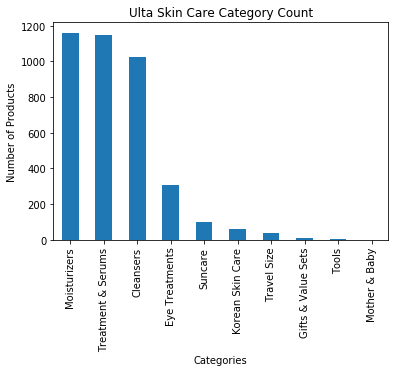

In [22]:
df['category'].value_counts(dropna=False).plot(kind='bar')
plt.title('Ulta Skin Care Category Count')
plt.ylabel('Number of Products')
plt.xlabel('Categories')

In [23]:
df.groupby('category')['reviews'].agg(['count','sum','mean']).sort_values('sum',ascending=False)

,count,sum,mean
category,,,
Moisturizers,1123,337190.0,300.258237
Cleansers,974,262509.0,269.516427
Treatment & Serums,1071,189137.0,176.598506
Eye Treatments,294,53422.0,181.707483
Travel Size,36,30597.0,849.916667
Suncare,95,17592.0,185.178947
Korean Skin Care,56,7246.0,129.392857
Gifts & Value Sets,10,3060.0,306.000000
Tools,4,872.0,218.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

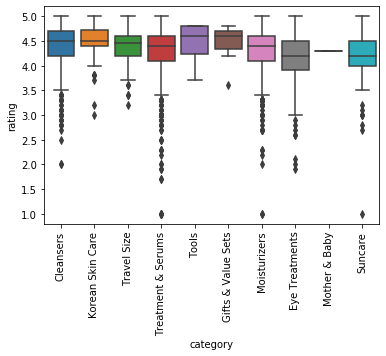

In [24]:
sns.boxplot(x='category', y='rating', data = df)
plt.xticks(rotation=90)

In [25]:
df.corr()

,size_oz,price,rating,reviews
size_oz,1.000000,-0.142266,0.100376,0.038893
price,-0.142266,1.000000,0.128219,0.048853
rating,0.100376,0.128219,1.000000,0.058387
reviews,0.038893,0.048853,0.058387,1.000000


## Top 3 Skin Care Categories
Also included dataset to include Eye Treatments and Suncare (top_5)

In [26]:
top_3 = df[df['category'].isin(['Moisturizers','Cleansers','Treatment & Serums'])]

In [27]:
top_5 = df[df['category'].isin(['Moisturizers','Cleansers','Treatment & Serums','Eye Treatments','Suncare'])]

**Cleansers** are **lower priced** than Treatment & Serums and Moisturizers, where it is skewed to the right. 

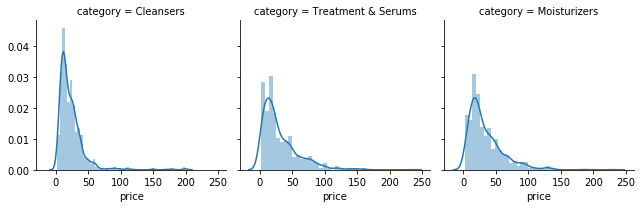

In [28]:
sns.FacetGrid(data=top_3, col='category').map(sns.distplot, 'price')

Smaller quantity does not necessarily guarantee lower price. **Treatment & Serums** and **Moisturizers** tend to be packaged in **smaller quantities** (fluid oz) than cleansers, despite having a higher price distribution. Factors, such as ingredients, concentration, frequency of use, etc., may contribute to pricing.

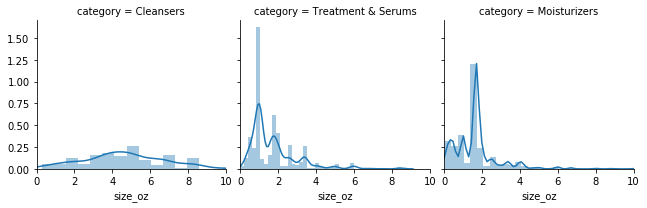

In [29]:
sns.FacetGrid(data=top_3, col='category').map(sns.distplot, 'size_oz').set(xlim=(0,10))

**Ratings** are **similarly** distributed above 4.0 between Cleansers, Treatment & Serums, and Moisturizers

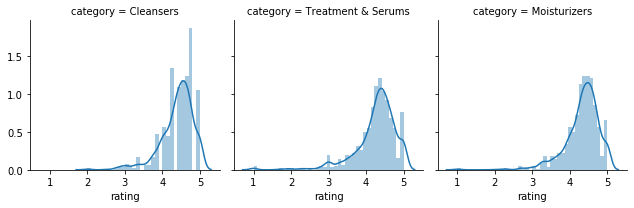

In [30]:
sns.FacetGrid(data=top_3, col='category').map(sns.distplot, 'rating')

However, **luxury** product pricing are **rated higher** than low-cost and fairly-priced products (with left skews)

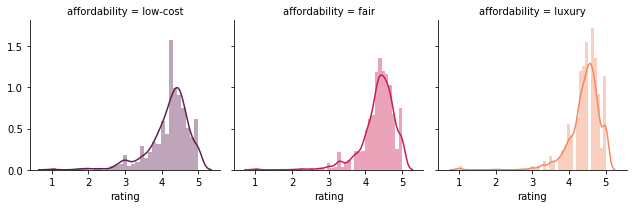

In [31]:
sns.FacetGrid(data=top_3, col='affordability', hue = 'affordability', palette = 'rocket').map(sns.distplot, 'rating')

Treatment & Serums are more likely to receive less reviews per product than Cleansers and Moisturizers

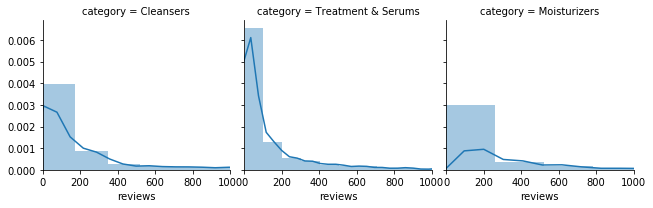

In [32]:
sns.FacetGrid(data=top_3, col='category').map(sns.distplot, 'reviews').set(xlim=(0,1000))

## Types of products in each Top 5 Category

Text(0.5, 1.0, 'Types of Cleansers')

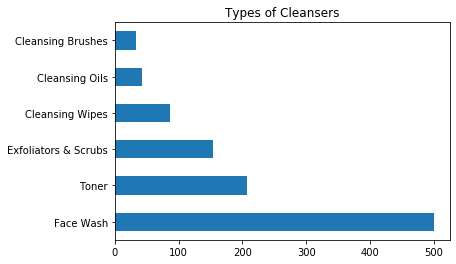

In [33]:
top_3[top_3['category']=='Cleansers']['type'].value_counts().plot(kind='barh')
plt.title('Types of Cleansers')

Text(0.5, 1.0, 'Types of Treatments & Serums')

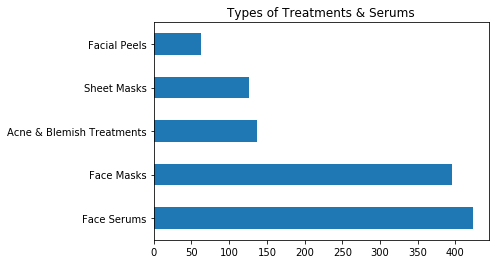

In [34]:
top_3[top_3['category']=='Treatment & Serums']['type'].value_counts().plot(kind='barh')
plt.title('Types of Treatments & Serums')

Text(0.5, 1.0, 'Types of Moisturizers')

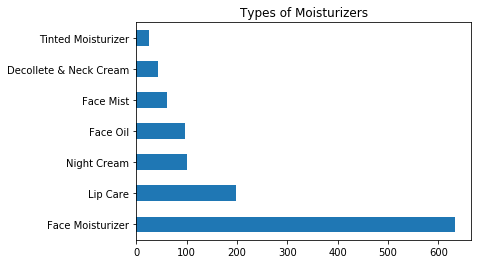

In [35]:
top_3[top_3['category']=='Moisturizers']['type'].value_counts().plot(kind='barh')
plt.title('Types of Moisturizers')

Text(0.5, 1.0, 'Types of Eye Treatments')

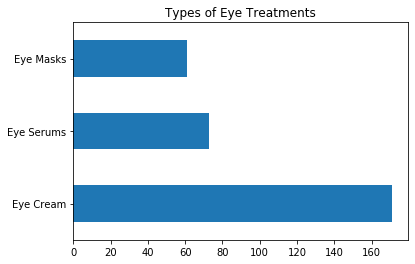

In [36]:
top_5[top_5['category']=='Eye Treatments']['type'].value_counts().plot(kind='barh')
plt.title('Types of Eye Treatments')

Text(0.5, 1.0, 'Types of Eye Suncare')

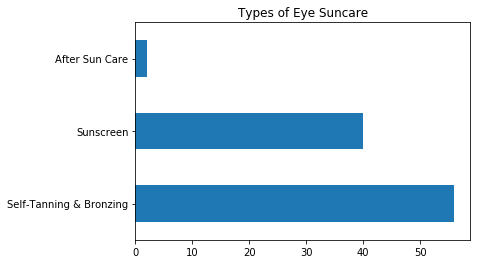

In [37]:
top_5[top_5['category']=='Suncare']['type'].value_counts().plot(kind='barh')
plt.title('Types of Eye Suncare')

### Category and Affordability Plot Summary
1. Cleansers consist mostly of **Face Wash** and are commonly priced at **low-cost and fair** values
2. Treatments & Serums consist of **Face Masks and Face Serums**. Treatments & Serums have almost **equal amounts of affordability** containing luxury, fairly-priced, and low cost products
3. Moisturizers consist mostly of **Face Moisturizers** and are commonly priced at **fair and luxury** values
4. Eye Treatments consist mostly of **Eye Cream** and are **luxury** products
5. Suncare consist mostly of **Self-Tanning & Bronzing** products and are priced **farily**.

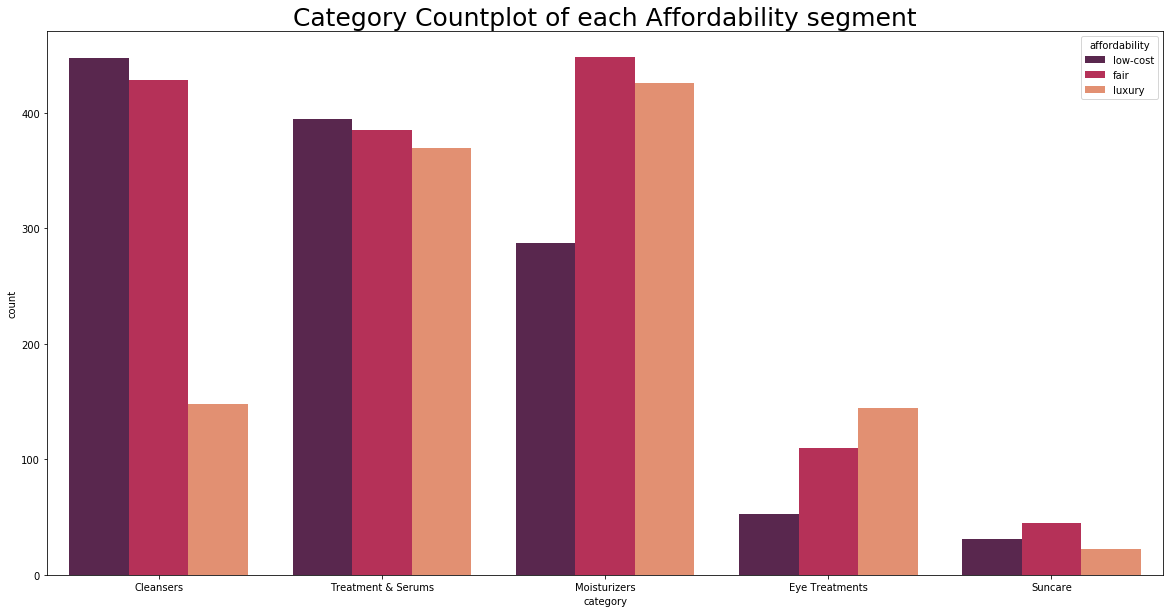

In [38]:
plt.figure(figsize=(20, 10))
plt.title("Category Countplot of each Affordability segment", fontsize=25)
sns.countplot(x="category", hue = "affordability", data=top_5, palette = 'rocket')

### Customer Reviews
1. Customers are more likely to try and review **low-cost Cleansers**
2. Customers are more likely to try and review **fair and luxury Treatment & Serums**
3. Customers are more likely to try and review **luxury Moisturizers**
4. Customers are more likely to try and review **fairly priced Eye Treatments**
5. Customers are more likely to try and review **low-cost and luxury Suncare**

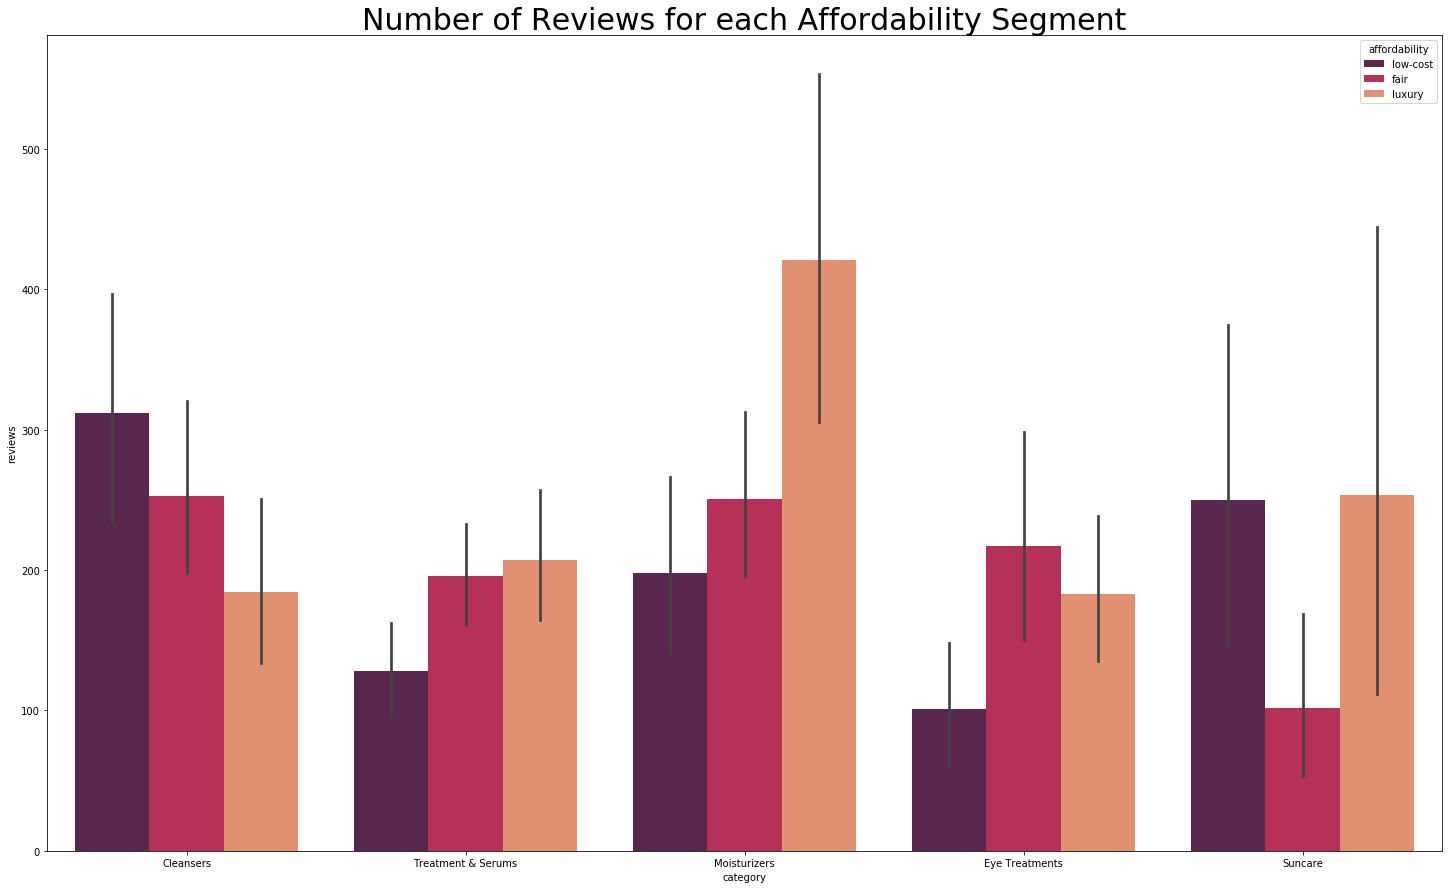

In [39]:
plt.figure(figsize=(25, 15))
plt.title("Number of Reviews for each Affordability Segment", fontsize=30)
sns.barplot(x="category",y="reviews", hue='affordability', data=top_5, palette = 'rocket')

## High Inventory (Product-Count) Brands

Ulta contains the **most Clinique products**, followed by Mario Badescu and Pacifica

In [40]:
df['brand'].value_counts()[:11]

Clinique               131
Mario Badescu           90
Pacifica                86
Dermalogica             84
Neutrogena              80
Kiehl's Since 1851      75
Lancôme                 69
TONYMOLY                57
Peter Thomas Roth       55
REVOLUTION SKINCARE     54
Philosophy              54
Name: brand, dtype: int64

In [41]:
top_5['brand'].value_counts()[:11]

Clinique               129
Mario Badescu           85
Pacifica                84
Dermalogica             83
Neutrogena              78
Kiehl's Since 1851      73
Lancôme                 68
TONYMOLY                56
Peter Thomas Roth       55
REVOLUTION SKINCARE     54
Philosophy              50
Name: brand, dtype: int64

In [42]:
top_3['brand'].value_counts()[:11]

Clinique               118
Mario Badescu           80
Pacifica                80
Dermalogica             77
Neutrogena              68
Kiehl's Since 1851      65
Lancôme                 63
REVOLUTION SKINCARE     53
TONYMOLY                50
Philosophy              44
No7                     43
Name: brand, dtype: int64

Text(0.5, 1.0, 'Number of Products per Brand')

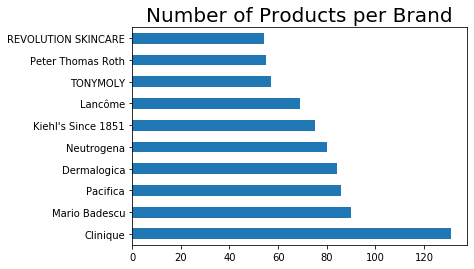

In [43]:
df['brand'].value_counts()[:10].plot(kind='barh')
plt.title("Number of Products per Brand", fontsize=20)

Text(0.5, 1.0, 'Number of Products per Brand')

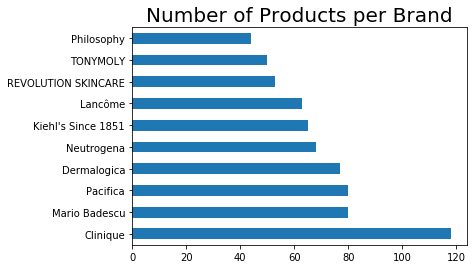

In [44]:
top_3['brand'].value_counts()[:10].plot(kind='barh')
plt.title("Number of Products per Brand", fontsize=20)

**Clinique** has the **most reviews**, followed by Neutrogena and Mario Badescu

Text(0.5, 1.0, 'Number of Reviews per Brand')

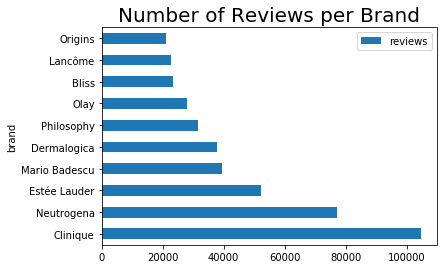

In [45]:
df.groupby('brand').agg({'reviews':'sum'}).sort_values(by='reviews',ascending=False)[:10].plot(kind='barh')
plt.title("Number of Reviews per Brand", fontsize=20)

Removing Clinique, we see that although Mario Badescu has more products, Neutrogena and Estee Lauder receive more reviews

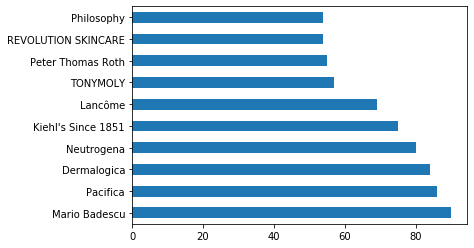

In [46]:
df['brand'].value_counts()[1:11].plot(kind='barh')

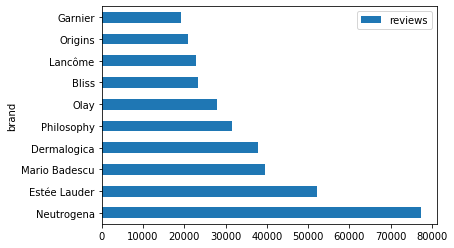

In [47]:
df.groupby('brand').agg({'reviews':'sum'}).sort_values(by='reviews',ascending=False)[1:11].plot(kind='barh')

In [48]:
top_8_brands = top_3[top_3['brand'].map(top_3['brand'].value_counts()) > 50]

* Clinique has notably more Moisturizers in their catalogue
* Neutrogena has notably more Cleansers in their catalogue
* REVOLUTION SKINCARE has notably more Treatment & Serums in their catalogue
* All other brands have slightly similar distribution across each category


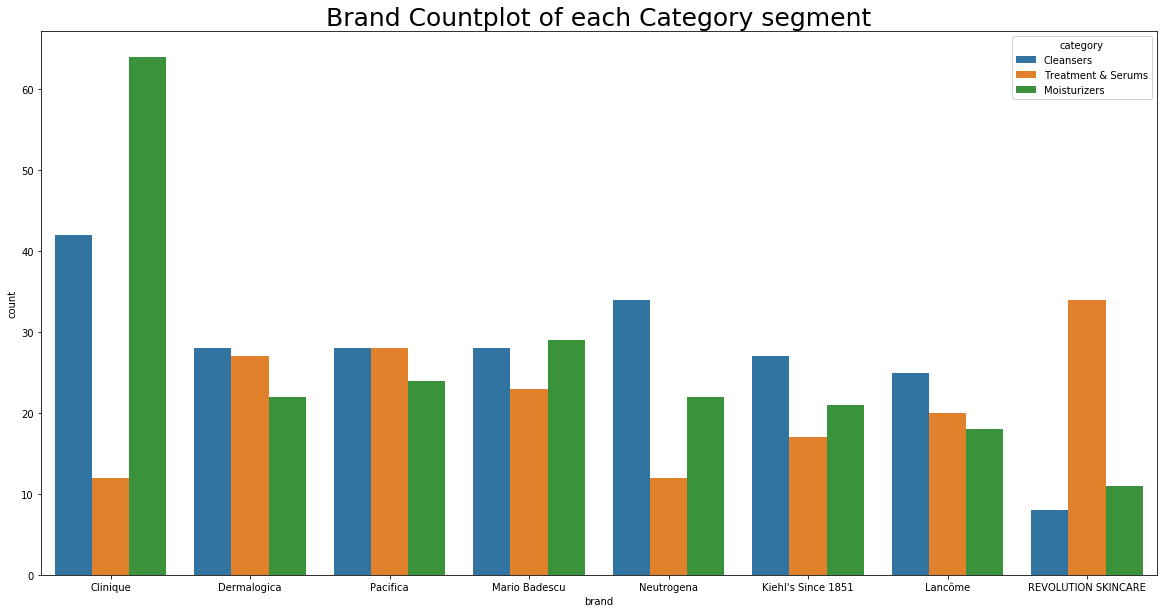

In [49]:
plt.figure(figsize=(20, 10))
plt.title("Brand Countplot of each Category segment", fontsize=25)
sns.countplot(x="brand", hue = "category", data=top_8_brands)

Brand Affordability Distribution
* Low-Cost Products: Pacifica, Neutrogena, REVOLUTION SKINCARE
* Fairly Priced Products: Clinique, Mario Badescu, Kiehl's Since 1851
* Luxury Products: Dermalogica, Lancome

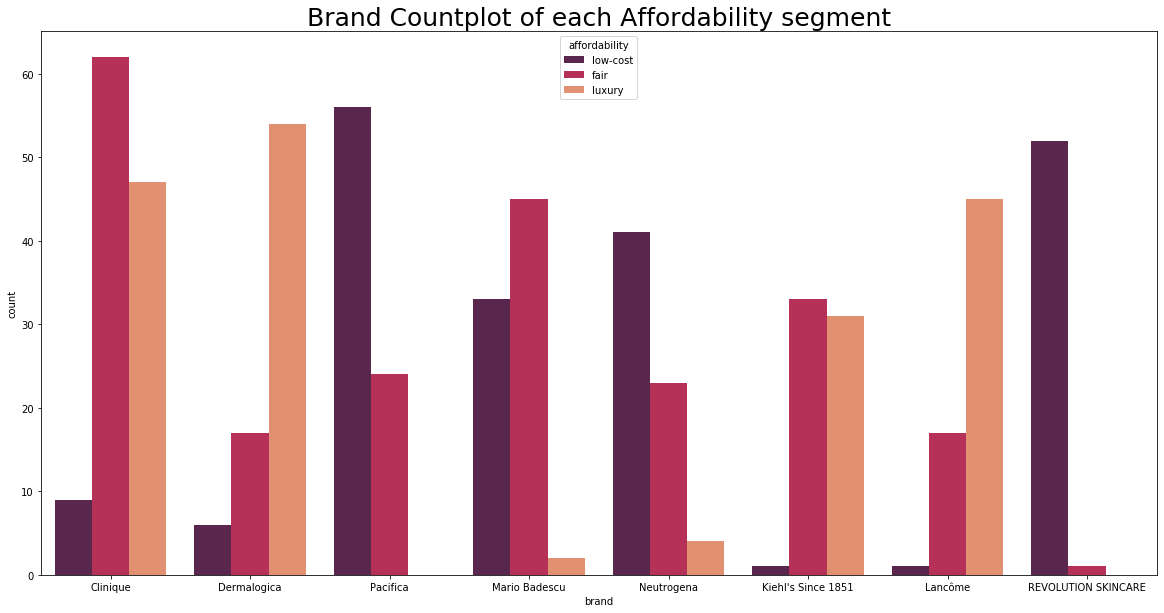

In [50]:
plt.figure(figsize=(20, 10))
plt.title("Brand Countplot of each Affordability segment", fontsize=25)
sns.countplot(x="brand", hue = "affordability", data=top_8_brands, palette = 'rocket')

Of the top 8 inventory brands in Ulta's catalogue:
* The following brands receive more **Cleanser** reviews: Dermalogica (have more Cleansers), Pacifica, Mario Badescu, and Neutrogena (have more Cleansers)
* The following brands receive more **Moisturizer** reviews: Clinique (have more Moisturizers) and Lancome
* The following brands receive more **Treatment & Serum** reviews: Kiehl's Since 1851

Although Ulta carries sizeable <font color = 'red'>Pacifica, Kiehl's Since 1851, and REVOLUTION SKINCARE products</font>, they receive the least amount of reviews compared to the other top 8 brands

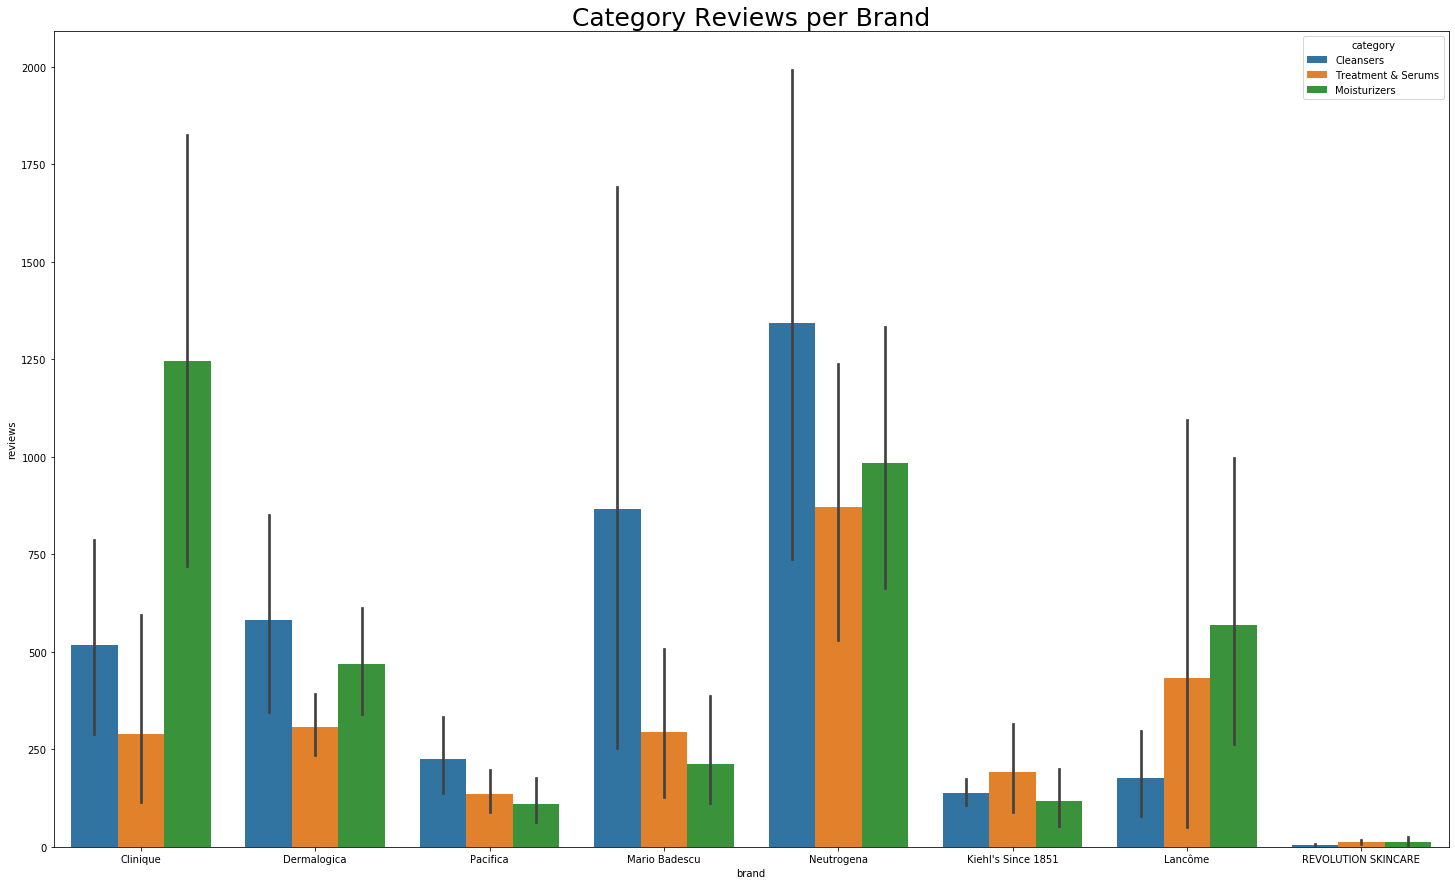

In [84]:
plt.figure(figsize=(25, 15))
plt.title("Category Reviews per Brand", fontsize=25)
sns.barplot(x="brand",y="reviews", hue='category', data=top_8_brands)

Of the top 8 inventory brands in Ulta's catalogue:
* The following brands receive more **Low-Cost** reviews: Dermalogica, Pacifica, Mario Badescu, Neutrogena, Kiehl's Since 1851, and REVOLUTION SKINCARE
* The following brands receive more **Luxury** reviews: Clinique and Lancome

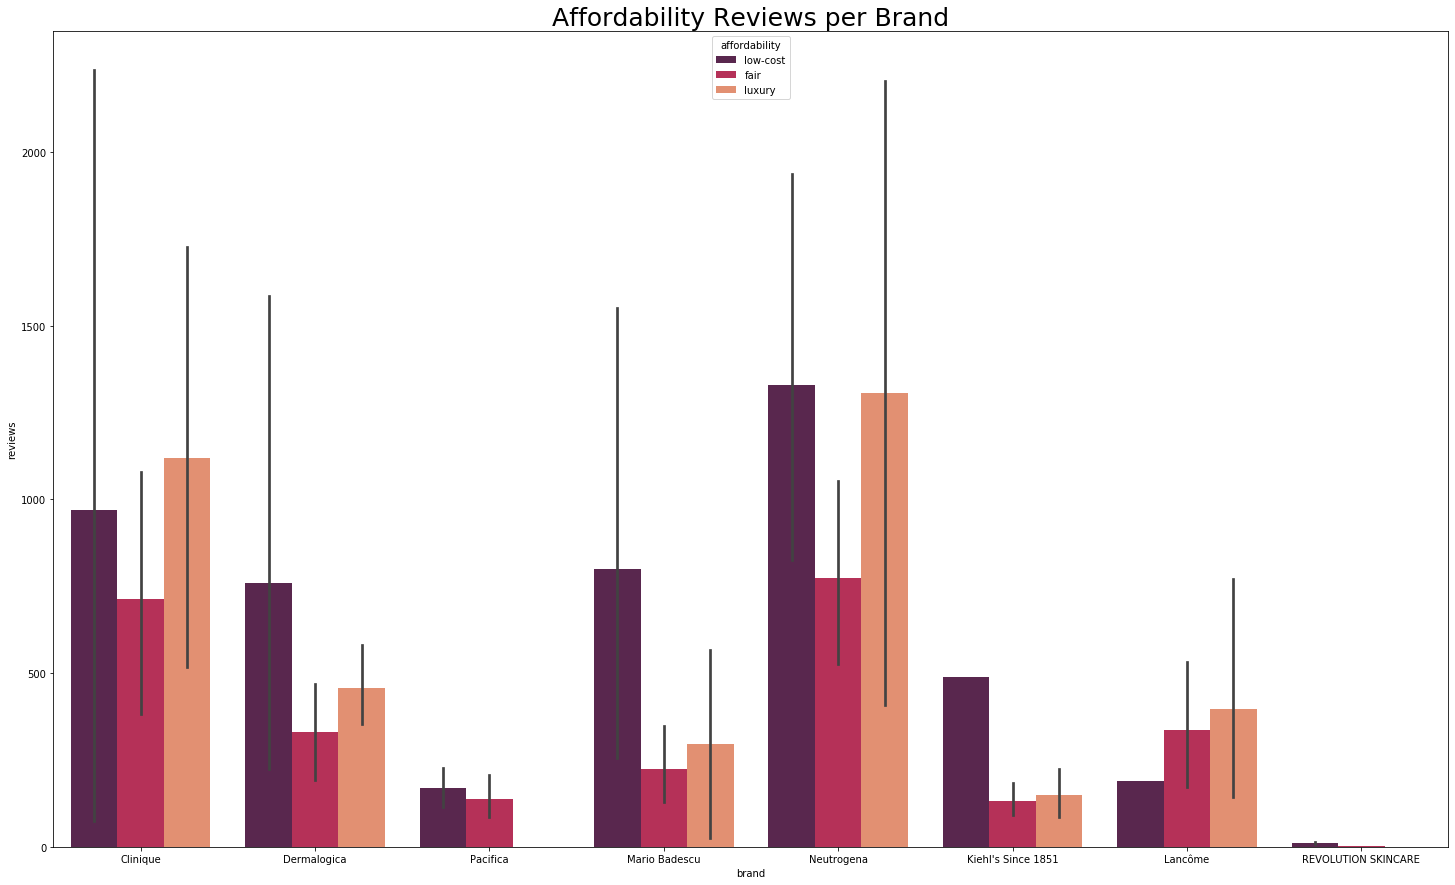

In [85]:
plt.figure(figsize=(25, 15))
plt.title("Affordability Reviews per Brand", fontsize=25)
sns.barplot(x="brand",y="reviews", hue='affordability', data=top_8_brands, palette = 'rocket')

The top 8 inventoried brands are rated similary (with the exception of REVOLUTION SKINCARE), however, **Lancome** has a slightly **higher rating** average.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

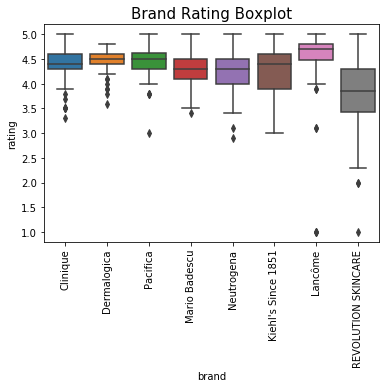

In [77]:
sns.boxplot(x='brand', y='rating', data = top_8_brands)
plt.title("Brand Rating Boxplot", fontsize=15)
plt.xticks(rotation=90)

Despite having more expensive products, Lancome maintains a higher average rating.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

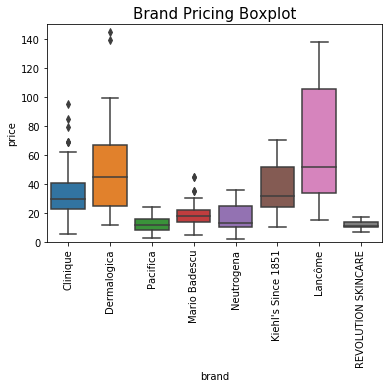

In [78]:
sns.boxplot(x='brand', y='price', data = top_8_brands).set(ylim=(0,150))
plt.title("Brand Pricing Boxplot", fontsize=15)
plt.xticks(rotation=90)

### Areas of Improvement (Oppurtunities)
**REVOLUTION SKINCARE** received the least amount of reviews and has the lowest rating, yet they inventory ~54 
skin care products
* Consider why this brand received little attention among users and determine if holding inventory will remain profitable

**Pacifica** received less than ~500 reviews, but falls in the low price range and has ~4.5 average rating

**Kiehl's Since 1851**
* Ulta carries 75 skin care products but only received less than ~500 reviews
* Pricing range is slighly higher than some brands like Pacifica, Mario Badescu, and Neutrogena
* Consider why this brand received little attention among users and determine if holding inventory will remain profitable

## Top Reviewed Brands
### Brands with most customer feedback
Since **Clinique** contains the most products, hence reviews, we will **disregard this brand** in this section

Text(0.5, 1.0, 'Most Reviewed Brands')

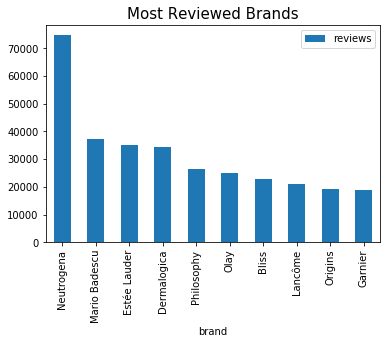

In [79]:
top_3.groupby('brand')[['reviews']].agg('sum').sort_values(by = 'reviews', ascending=False)[1:11].plot(kind='bar')
plt.title("Most Reviewed Brands", fontsize=15)

In [56]:
high_brand_reviews = top_3.groupby('brand')[['reviews']].agg('sum').sort_values(by = 'reviews', ascending=False)[1:11].index

In [57]:
high_review_df = top_3[top_3['brand'].isin(high_brand_reviews)]

Of the top 10 most reviewed brands in Ulta's catalogue (after Clinique):
* The following brands receive more **Cleanser** reviews: Dermalogica, Mario Badescu, Neutrogena, Philosphy
* The following brands receive more **Moisturizer** reviews: Estee Lauder, Bliss, Lancome
* The following brands receive more **Treatment & Serum** reviews: Origins, Garnier, Olay

Text(0.5, 1.0, 'Brand Countplot of each Category Segment')

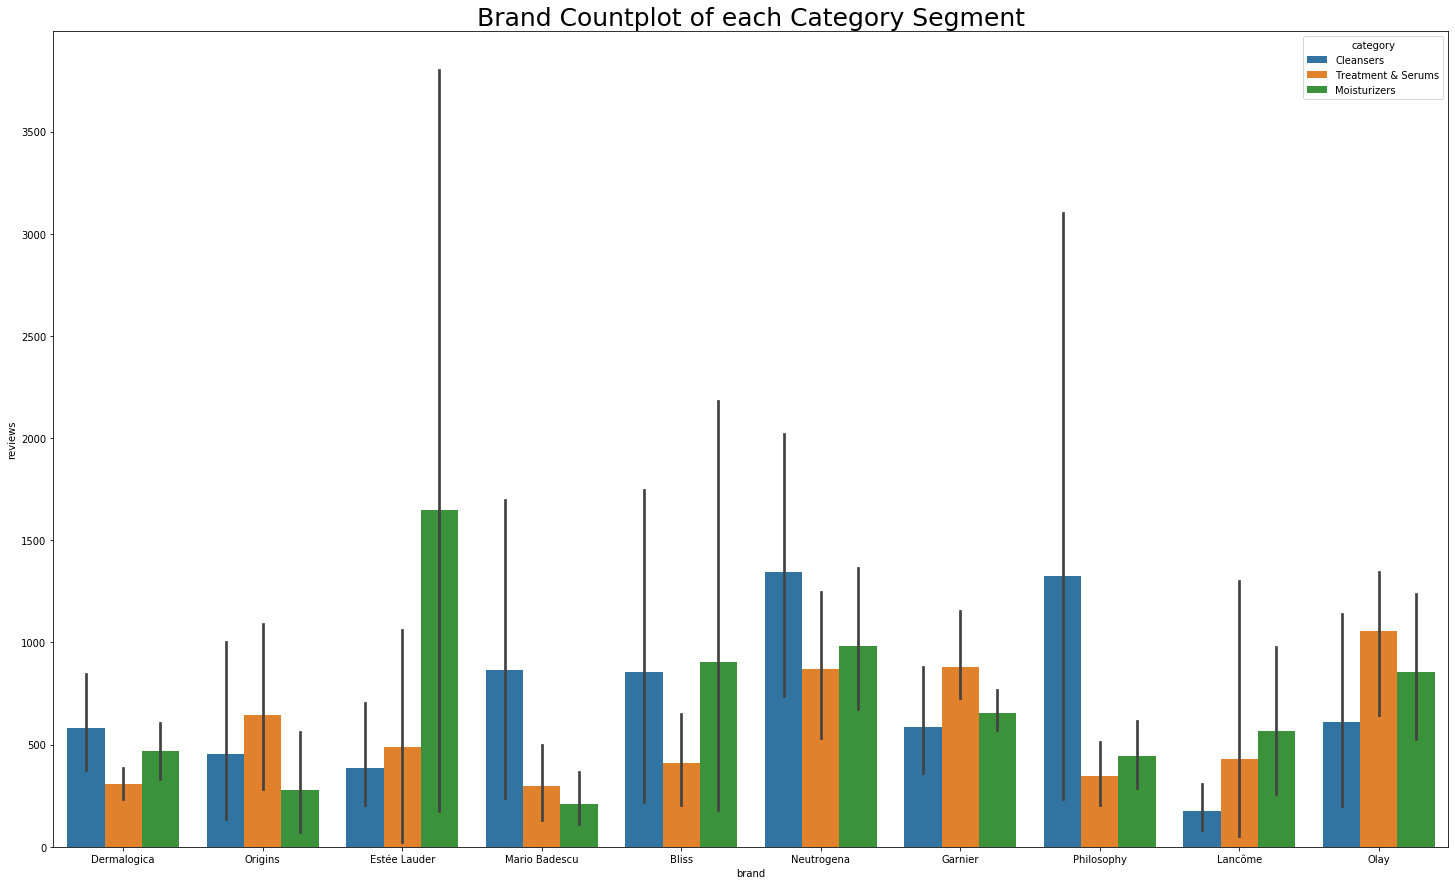

In [80]:
plt.figure(figsize=(25, 15))
sns.barplot(x="brand",y="reviews", hue='category', data=high_review_df)
plt.title("Brand Countplot of each Category Segment", fontsize=25)

Of the top 10 most reviewed brands in Ulta's catalogue (after Clinique):
* The following brands receive more **Low-cost** reviews: Dermalogica, Mario Badescu, Neutrogena (followed closely with Luxury), Garnier, Olay
* The following brands receive more **Fair** reviews: Origins, Bliss, Philosophy
* The following brands receive more **Luxury** reviews: Estee Lauder

Text(0.5, 1.0, 'Brand Countplot of each Affordability segment')

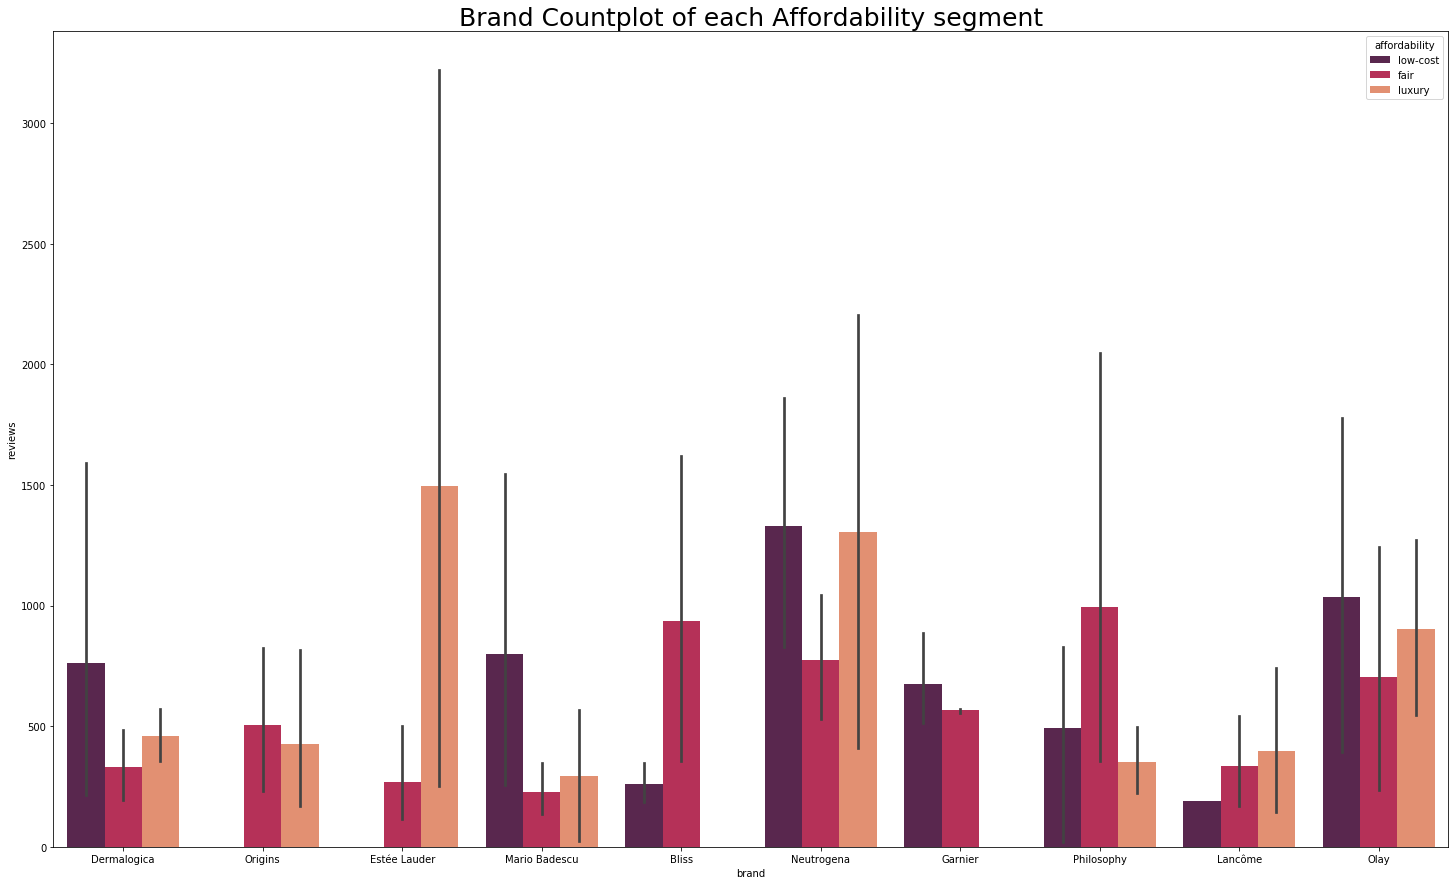

In [81]:
plt.figure(figsize=(25, 15))
sns.barplot(x="brand",y="reviews", hue='affordability', data=high_review_df, palette = 'rocket')
plt.title("Brand Countplot of each Affordability segment", fontsize=25)


The brands with the highest reviews have similar average rating

Text(0.5, 1.0, 'Brand Rating Boxplot')

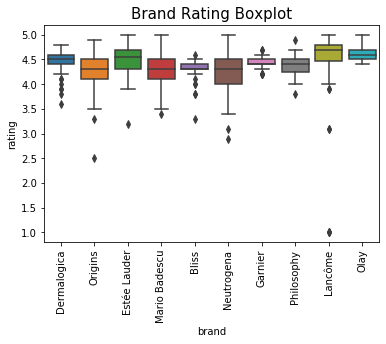

In [82]:
sns.boxplot(x='brand', y='rating', data = high_review_df)
plt.xticks(rotation=90)
plt.title("Brand Rating Boxplot", fontsize=15)


Text(0.5, 1.0, 'Brand Pricing Boxplot')

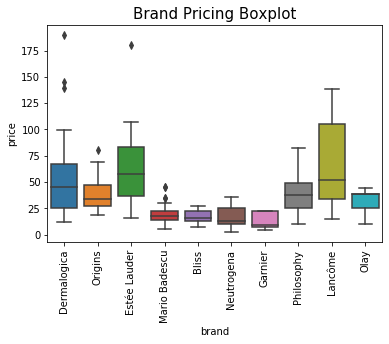

In [83]:
sns.boxplot(x='brand', y='price', data = high_review_df)
plt.xticks(rotation=90)
plt.title("Brand Pricing Boxplot", fontsize=15)


### More Visualizations

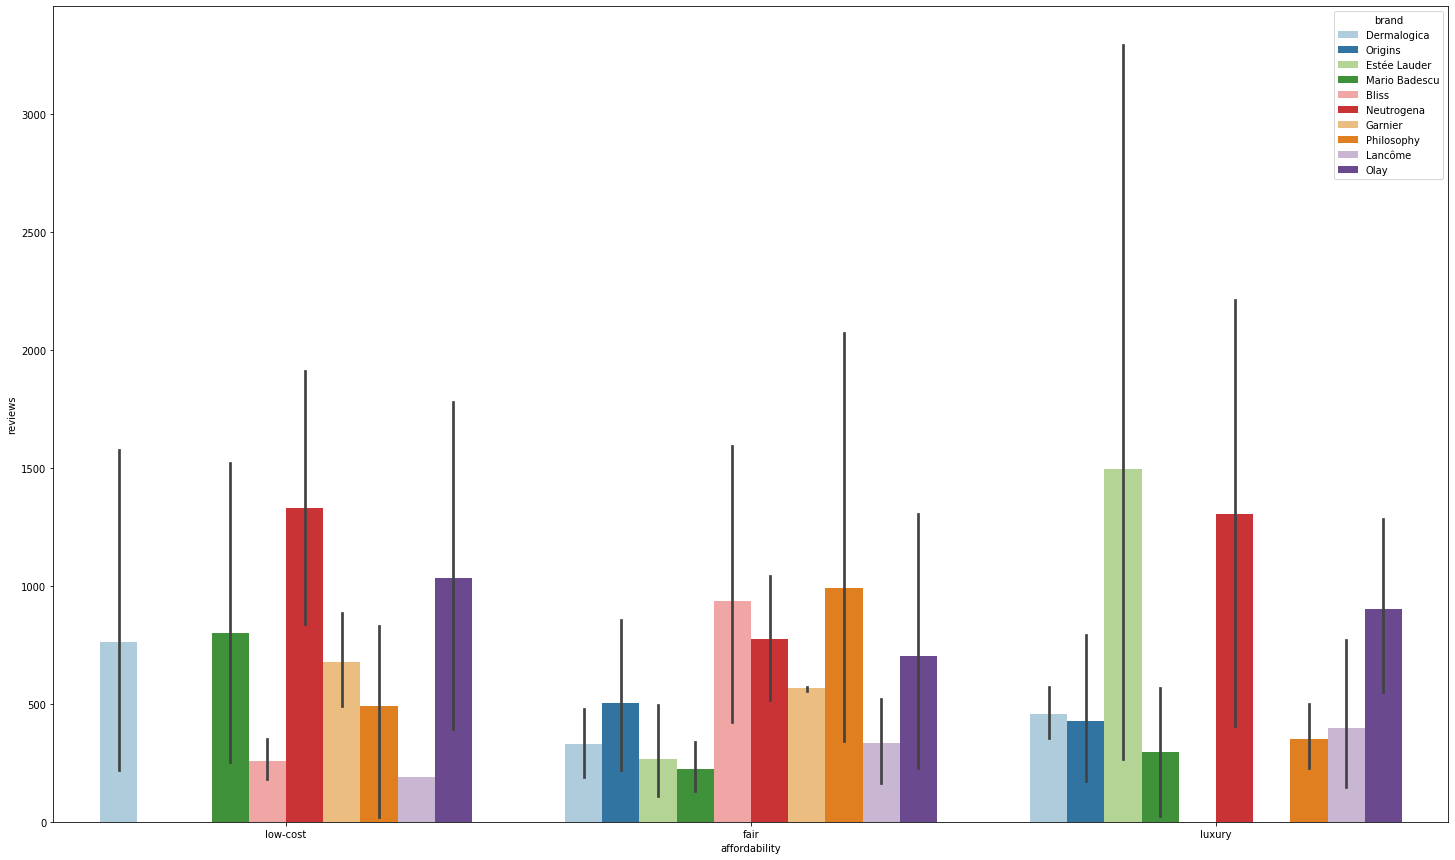

In [62]:
plt.figure(figsize=(25, 15))
sns.barplot(x="affordability",y="reviews", hue='brand', data=high_review_df, palette = 'Paired')

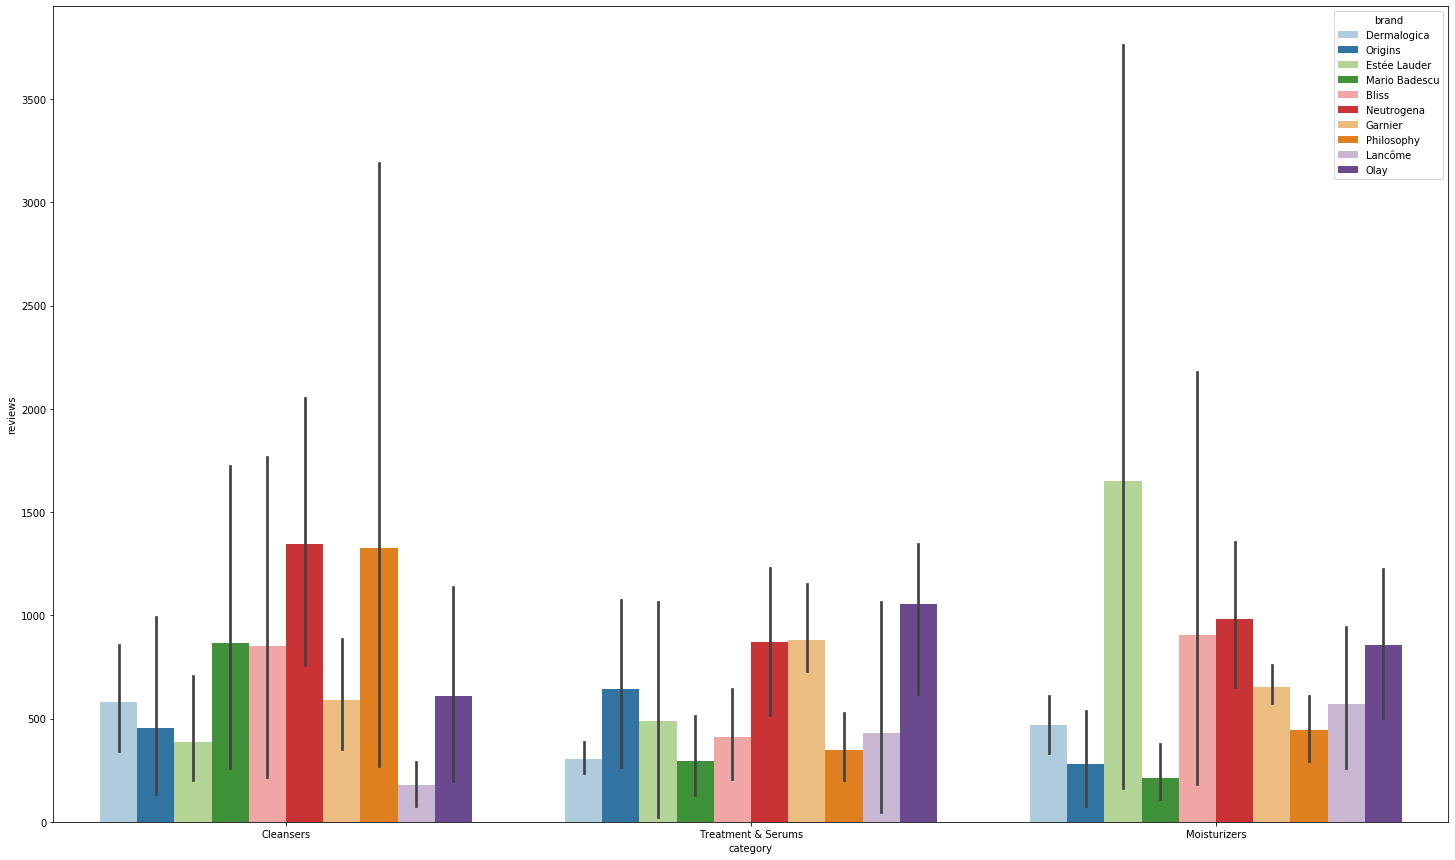

In [63]:
plt.figure(figsize=(25, 15))
sns.barplot(x="category",y="reviews", hue='brand', data=high_review_df, palette = 'Paired')

## Cleansers

In [64]:
df_cleansers = df[df['category']=='Cleansers']

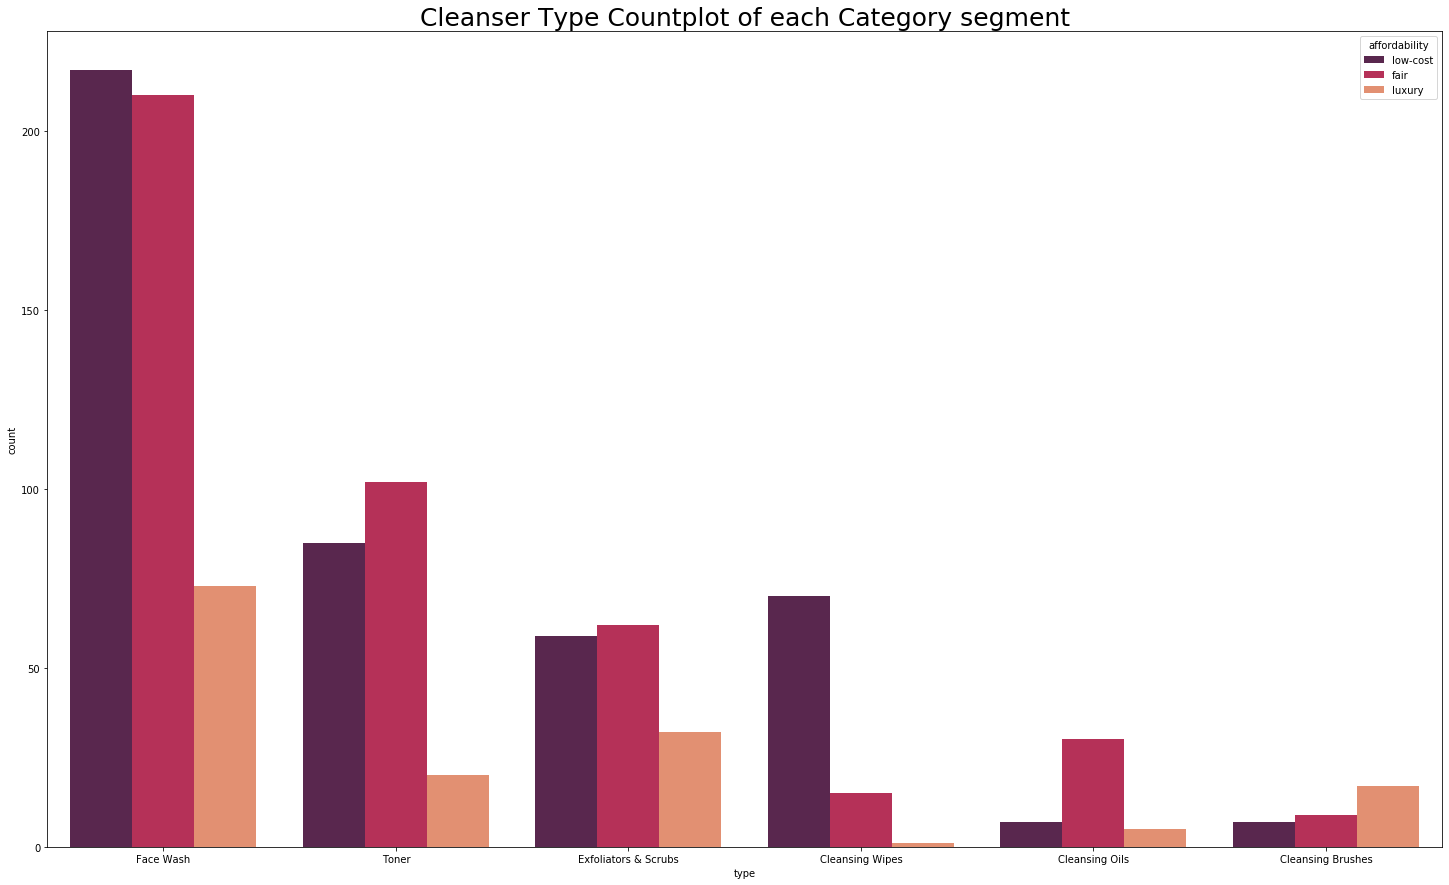

In [65]:
plt.figure(figsize=(25, 15))
plt.title("Cleanser Type Countplot of each Category segment", fontsize=25)
sns.countplot(x="type", hue = "affordability", data=df_cleansers, palette = 'rocket')

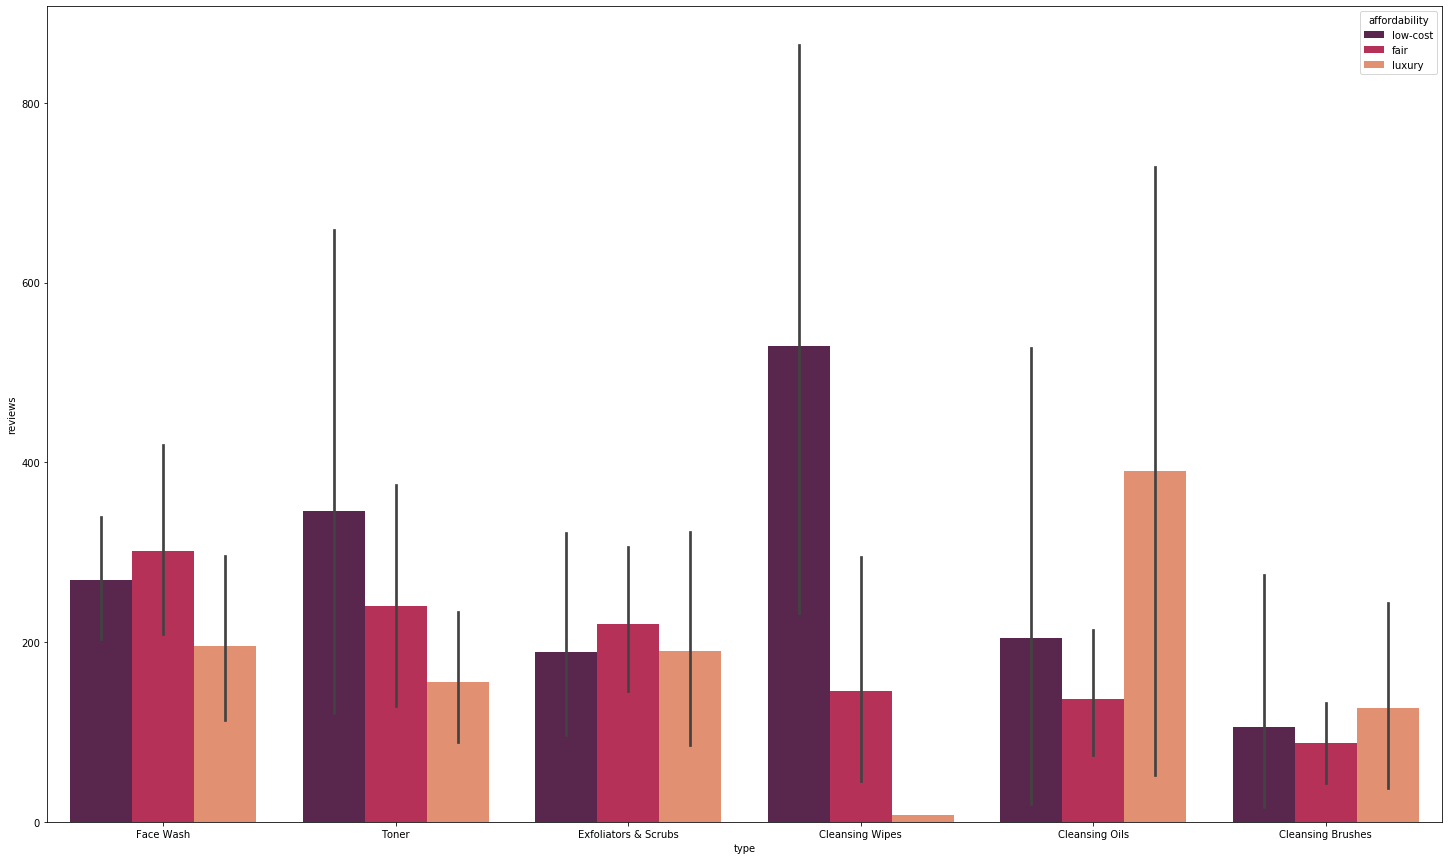

In [66]:
plt.figure(figsize=(25, 15))
sns.barplot(x="type",y="reviews", hue='affordability', data=df_cleansers, palette = 'rocket')

## Treatment & Serums

In [67]:
df_treatserum = df[df['category']=='Treatment & Serums']

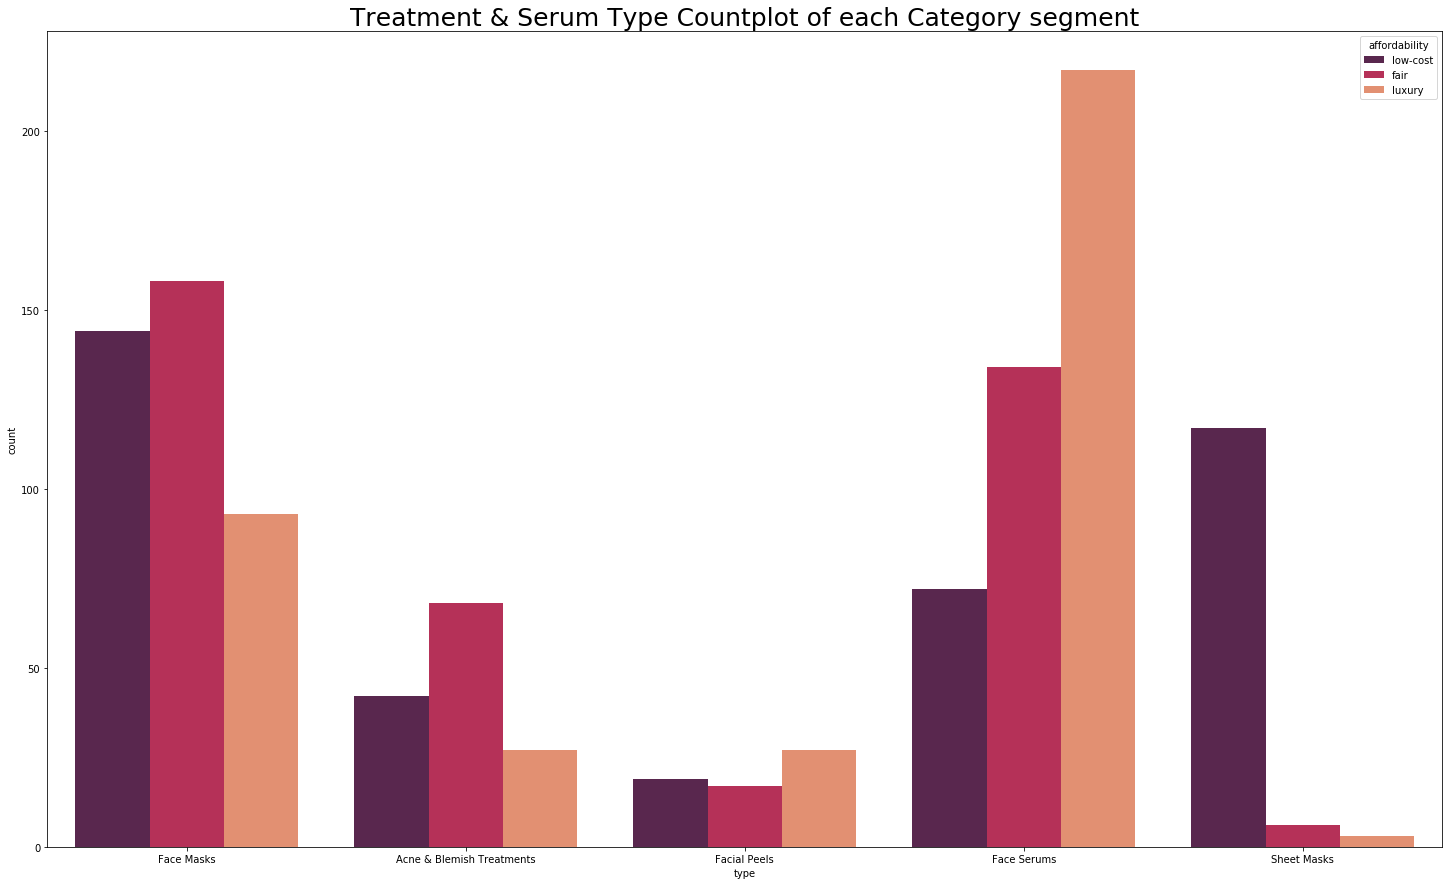

In [68]:
plt.figure(figsize=(25, 15))
plt.title("Treatment & Serum Type Countplot of each Category segment", fontsize=25)
sns.countplot(x="type", hue = "affordability", data=df_treatserum, palette = 'rocket')

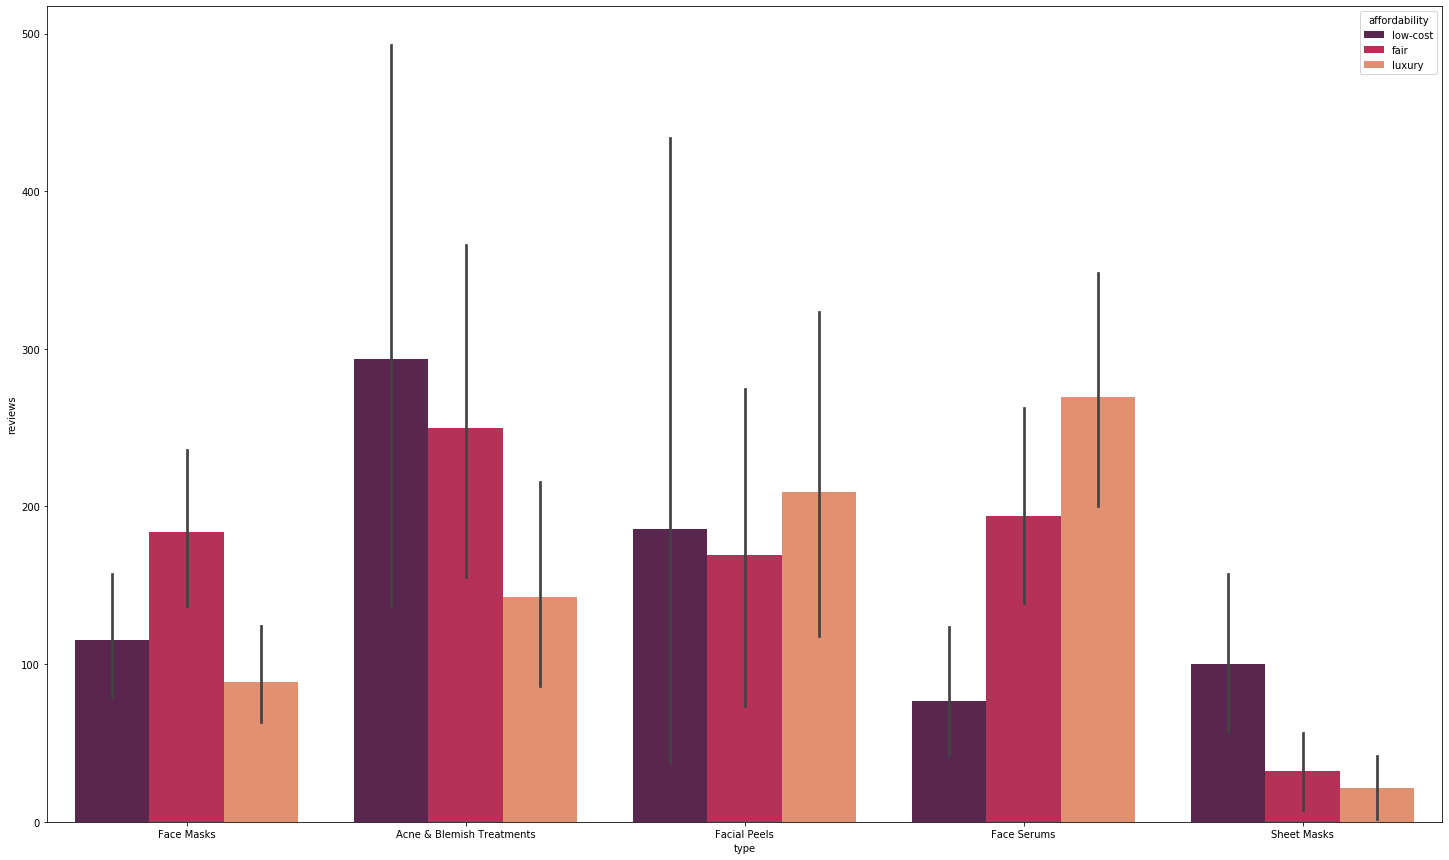

In [69]:
plt.figure(figsize=(25, 15))
sns.barplot(x="type",y="reviews", hue='affordability', data=df_treatserum, palette = 'rocket')

## Moisturizers

In [70]:
df_moisturizers = df[df['category']=='Moisturizers']

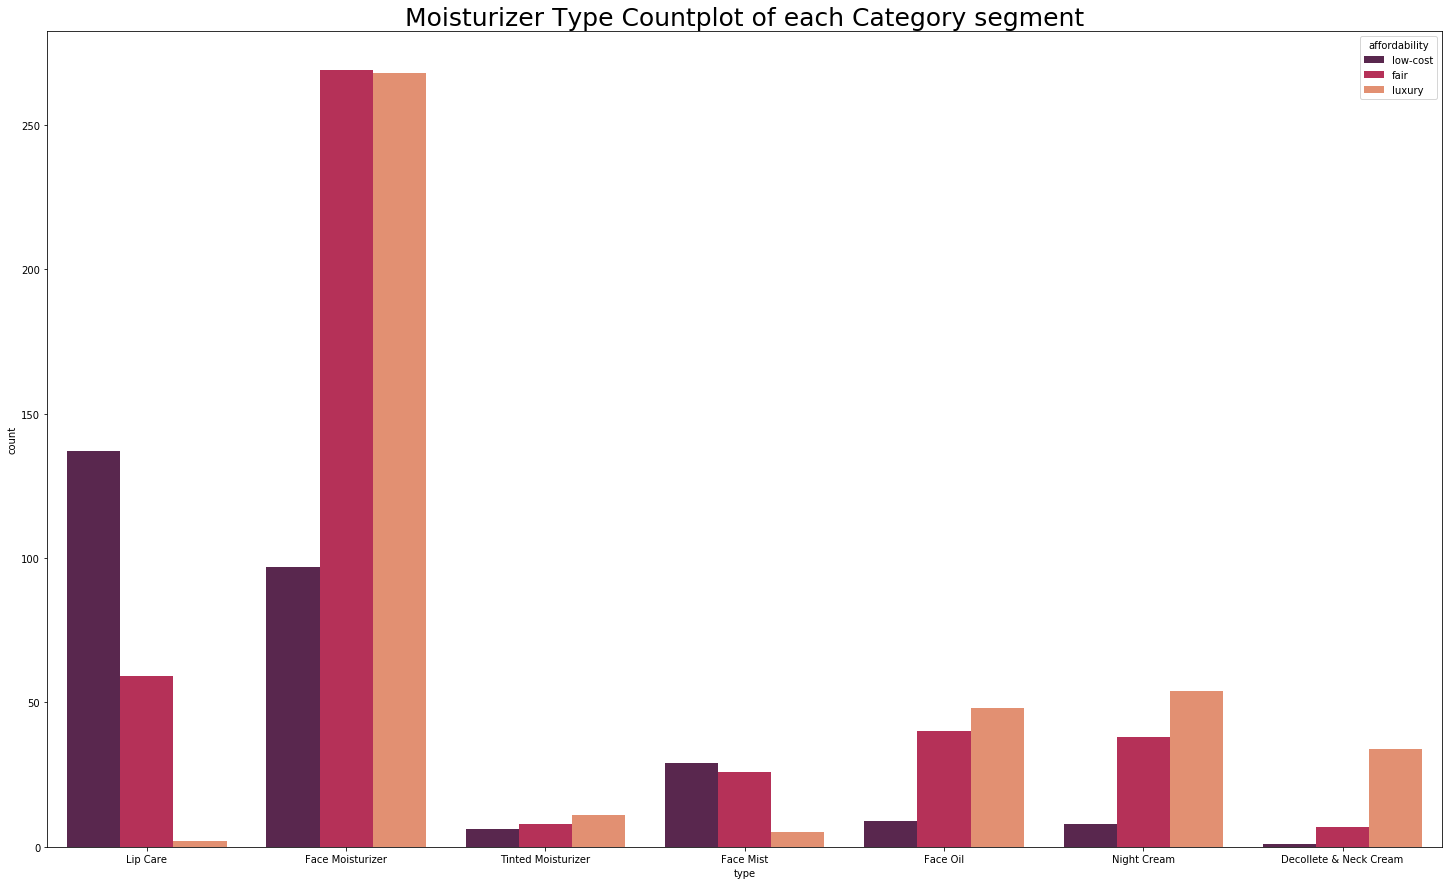

In [71]:
plt.figure(figsize=(25, 15))
plt.title("Moisturizer Type Countplot of each Category segment", fontsize=25)
sns.countplot(x="type", hue = "affordability", data=df_moisturizers, palette = 'rocket')

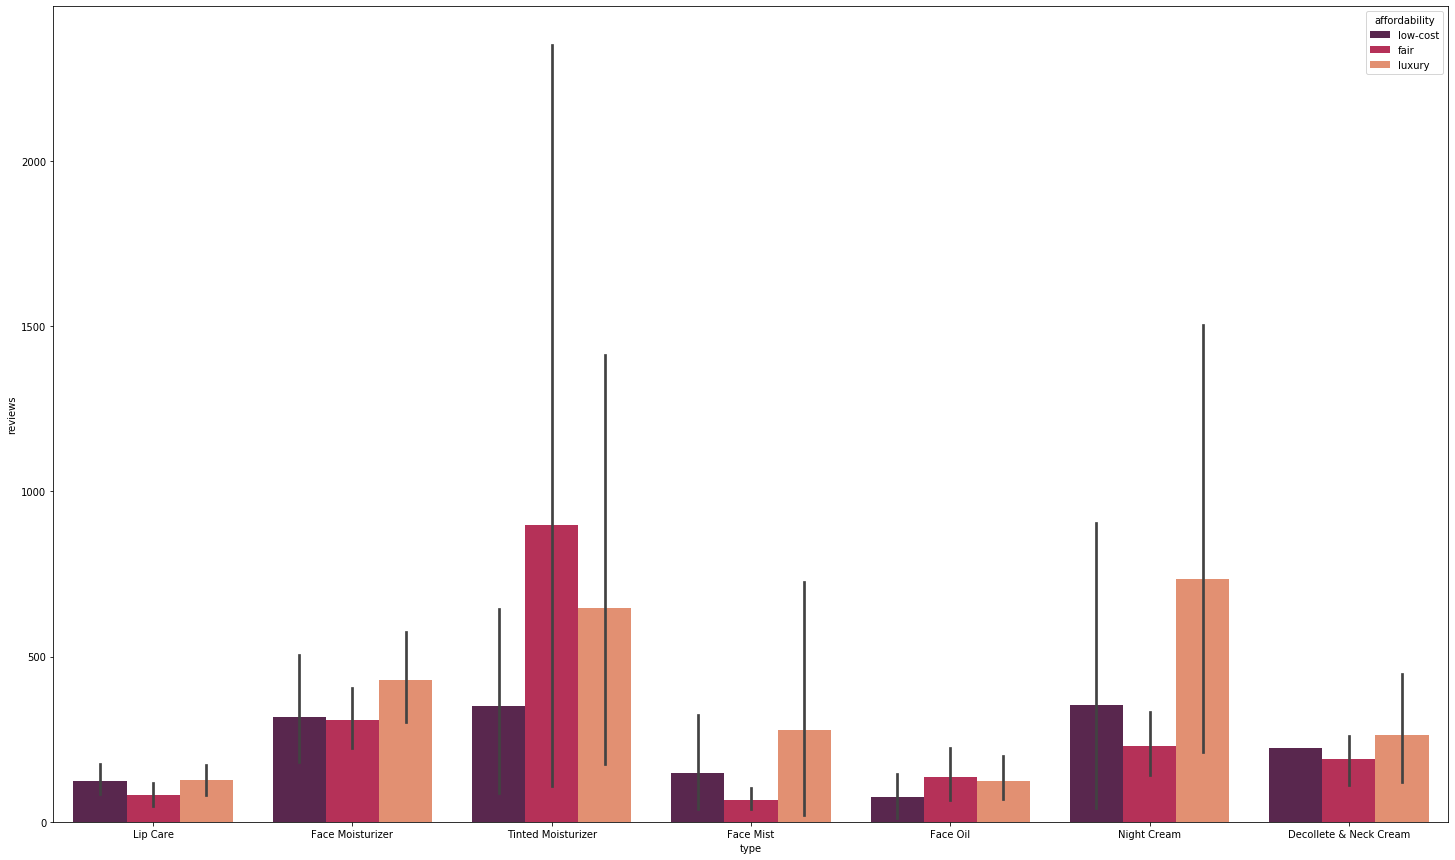

In [72]:
plt.figure(figsize=(25, 15))
sns.barplot(x="type",y="reviews", hue='affordability', data=df_moisturizers, palette = 'rocket')